In [34]:
!git clone https://github.com/Antonomaz/Corpus.git 2> nul || cd Corpus && git pull

Already up to date.


In [35]:
from bs4 import BeautifulSoup
from pprint import pprint
from glob import glob
import json
from numpy import mean, std, amax, amin
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import re
from collections import Counter

In [36]:
with open("LGERM.json", encoding="utf-8") as f:
    LGERM = json.load(f)
mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


In [37]:
def ttr(line):
    line = line.split()
    return len([word for word in line if word in mots_LGERM])/len(line)

def tok_voc_ratio(str):
    if not str:
        return
    lstr = str.split()
    return len(set(lstr))/len(lstr)

def compte_hapax(str):
    ct = Counter(str)
    return len([val for val in ct.values() if val == 1])

files = files
docs_ttrs = np.zeros((len(files) - 1, 4))
lst_trvr = []
nb_hapax = []
for i, file in enumerate(tqdm(files)):
    with open(file, "r", encoding="utf-8") as f:
        txt = f.read()

    txt = re.split(r"(?:<pb .*?>)", txt)
    txt = txt[1:]

    txt = [re.split(r"\n|<lb/>|<l>", line) for line in txt]

    txt = [[re.sub(r"<.*?>|  |\t", "", line) for line in page] for page in txt]

    txt = [[line for line in page if line.strip()] for page in txt]

    txt = [page for page in txt if page]

    pages = [' '.join(line for line in page) for page in txt]

    plain = ' '.join(mot for page in txt for line in page for mot in line)

    if not txt:
        print(f"Empty file: {file}, {i = }")
        continue

    lst_trvr.append(tok_voc_ratio(plain))

    nb_hapax.append(compte_hapax(plain))

    ttrs = [ttr(page) for page in pages]

    # Calculate the max, min , mean and standard deviation of the ttr of each document
    if i < 879:
        pos = i
    else:
        pos = i -1

    docs_ttrs[pos] = np.array([amax(ttrs), amin(ttrs), mean(ttrs), std(ttrs)])






  0%|          | 0/3065 [00:00<?, ?it/s]

Empty file: Corpus/Mazarinades/1201-1300/Moreau1240_GALL.xml, i = 879


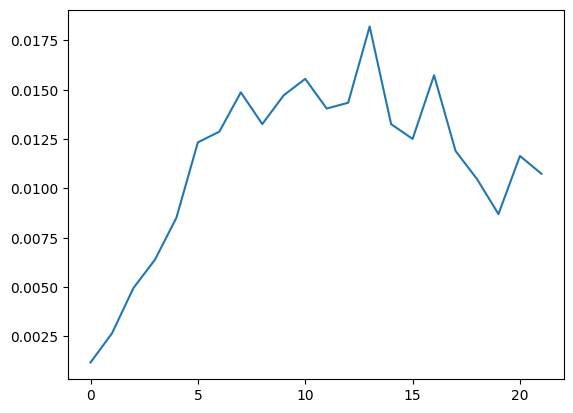

In [38]:
d = {k : [] for k in set(nb_hapax)}
for k, v in zip(nb_hapax, lst_trvr):
    d[k].append(v)

tup = [(k, mean(v)) for k, v in d.items()]

plt.plot(*zip(*tup))



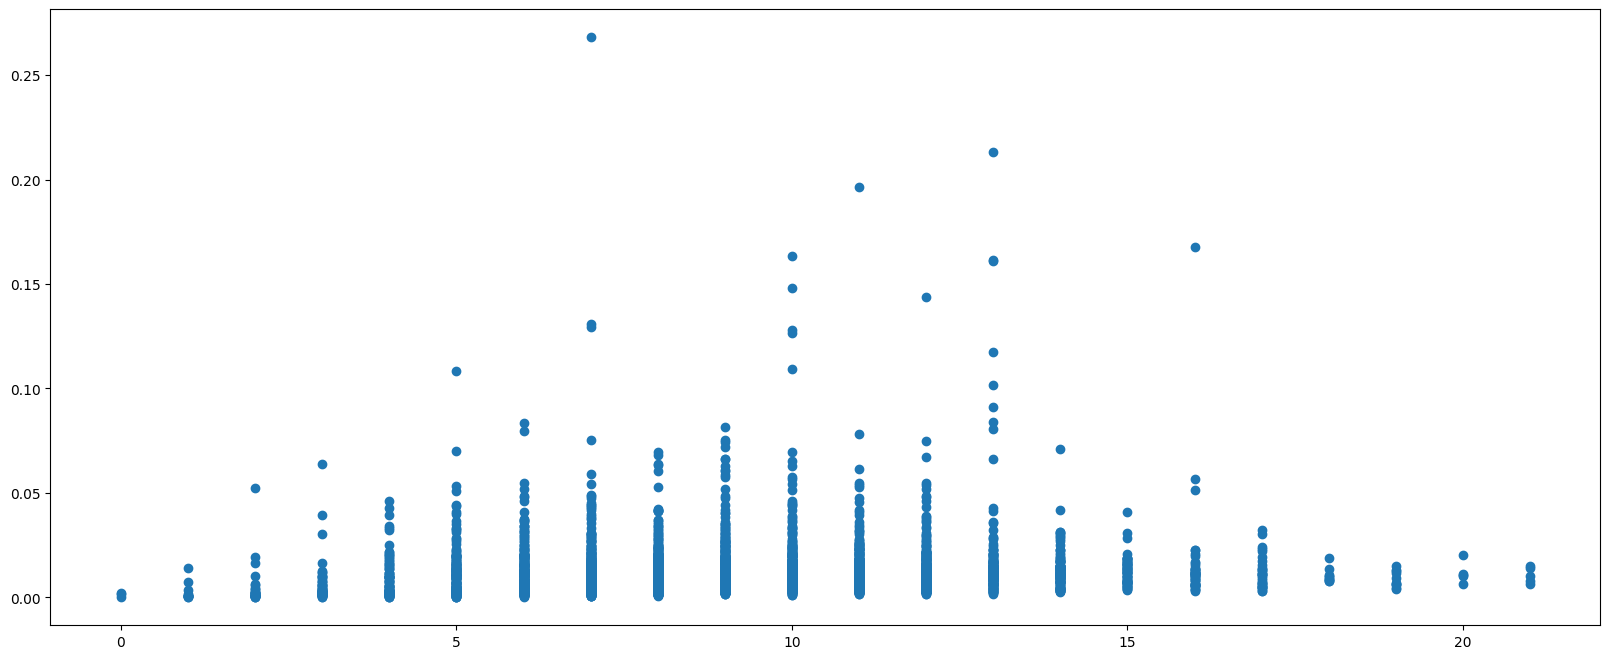

In [39]:
plt.figure(figsize=(20,8), dpi=100)
plt.scatter(nb_hapax, lst_trvr)
plt.show()


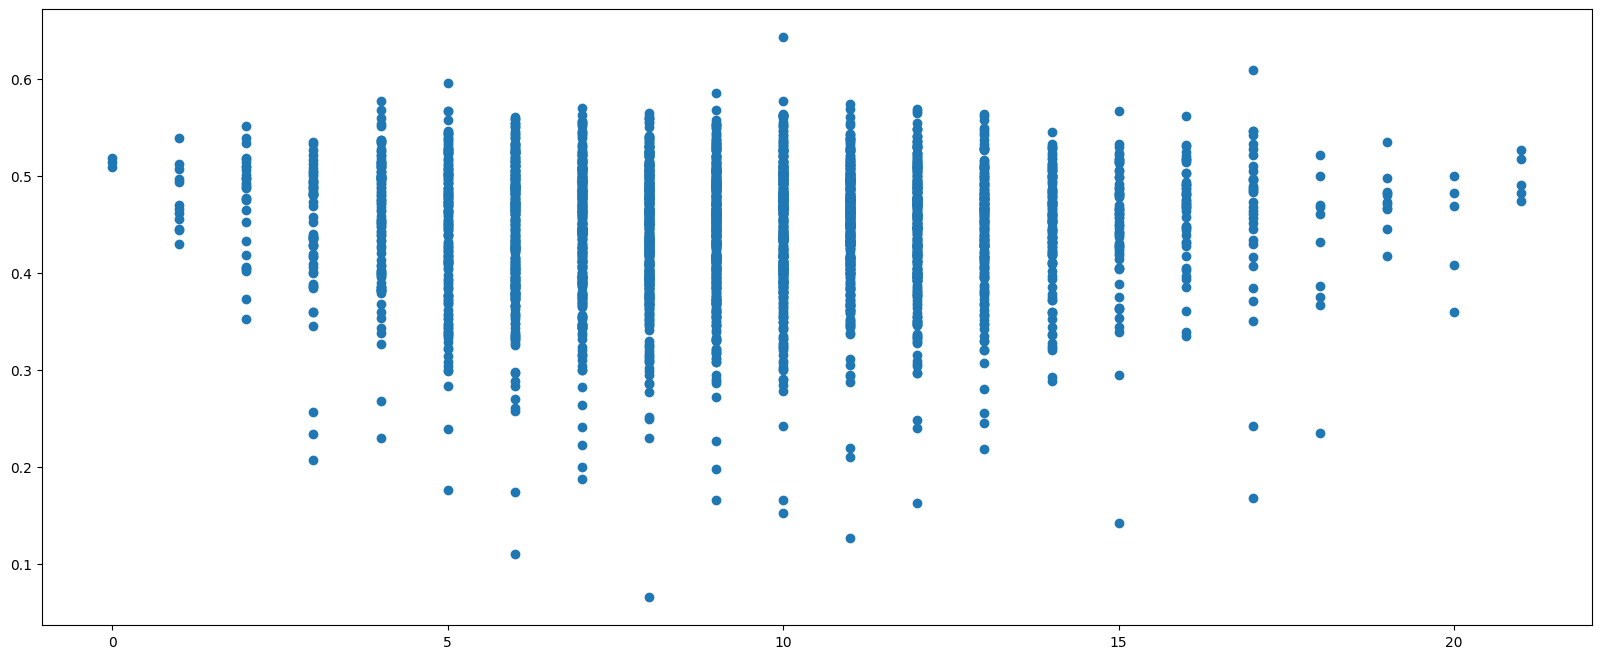

In [40]:
docs_ttrs_mean = docs_ttrs[:, 2]

plt.figure(figsize=(20,8), dpi=100)

plt.scatter(nb_hapax, docs_ttrs_mean)

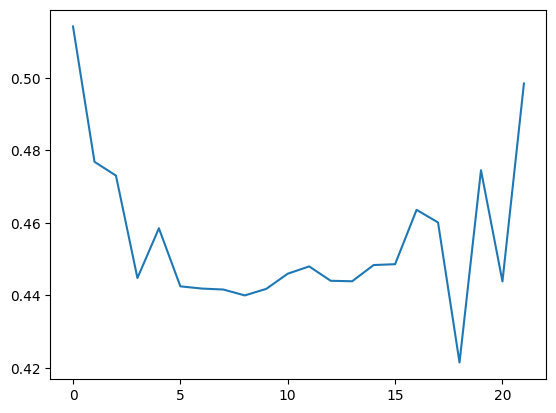

In [41]:
d = {k : [] for k in set(nb_hapax)}
for k, v in zip(nb_hapax, docs_ttrs_mean):
    d[k].append(v)

tup = [(k, mean(v)) for k, v in d.items()]

plt.plot(*zip(*tup))


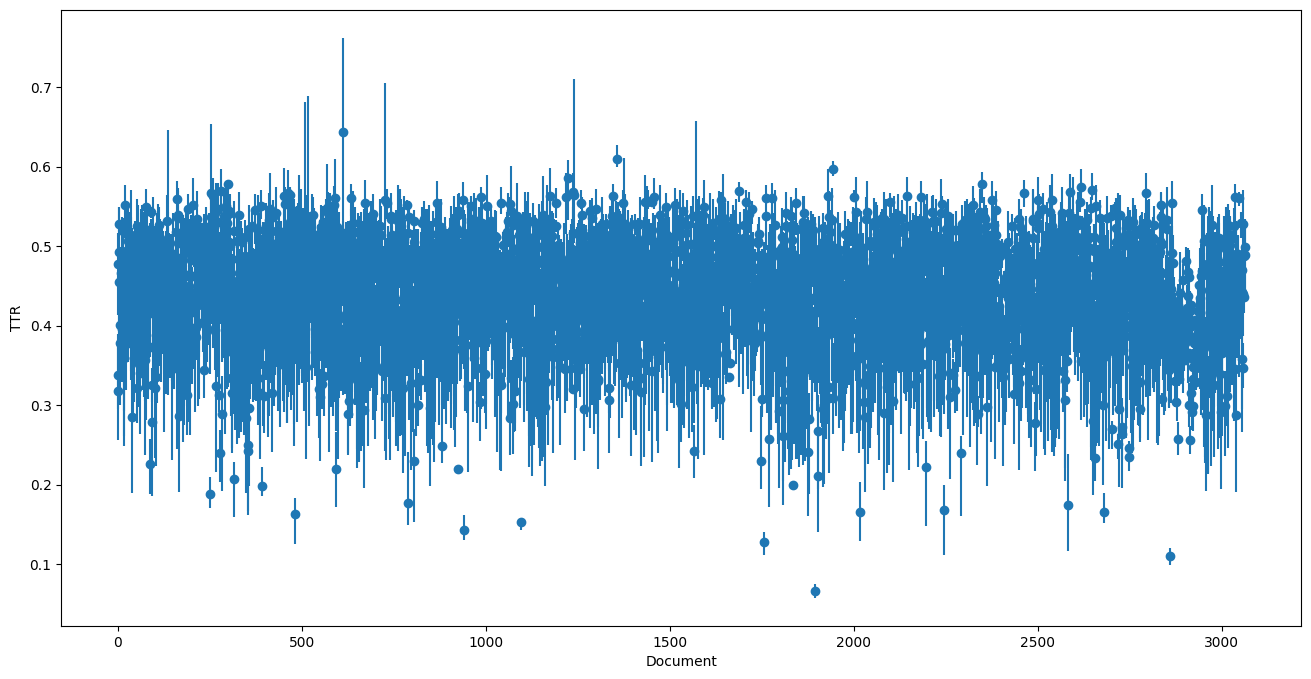

In [42]:
plt.figure(figsize=(16,8), dpi=100)

plt.errorbar(range(len(files) - 1), docs_ttrs[:, 2], yerr=[(docs_ttrs[:, 2]-docs_ttrs[:, 1])/3, (docs_ttrs[:, 0]-docs_ttrs[:, 2])/3], fmt="o")
plt.xlabel("Document")
plt.ylabel("TTR")
plt.savefig("test.png")


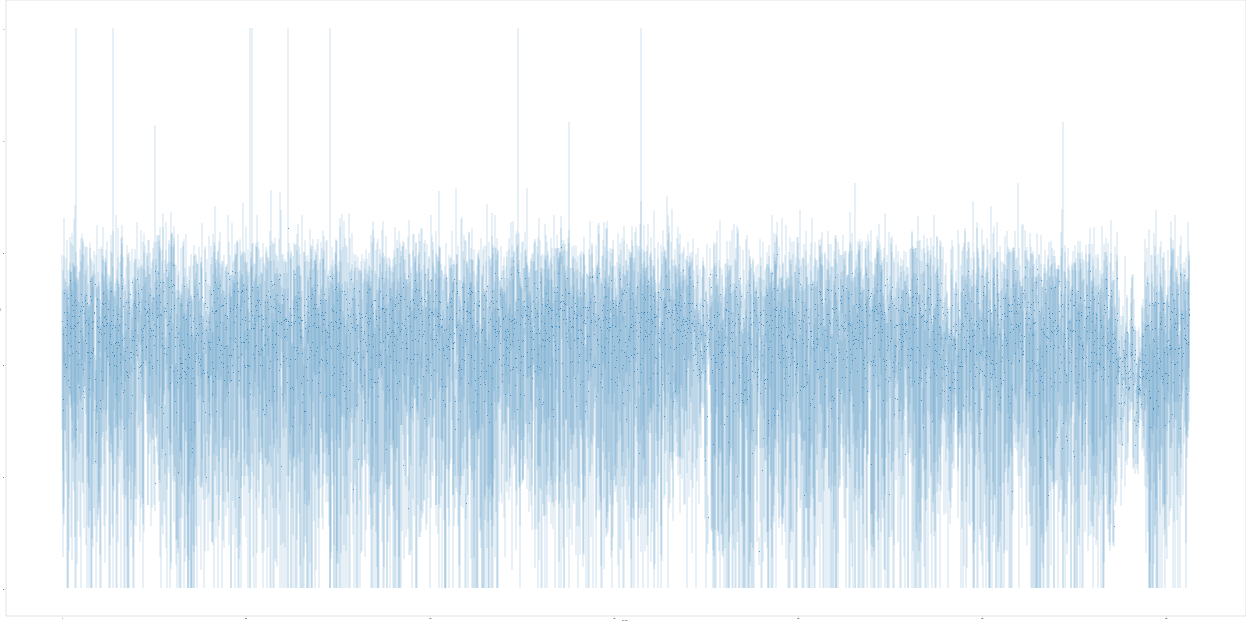

In [43]:
plt.figure(figsize=(160, 80), dpi=10)

plt.errorbar(range(len(files) - 1), docs_ttrs[:, 2], yerr=[docs_ttrs[:, 2]-docs_ttrs[:, 1], docs_ttrs[:, 0]-docs_ttrs[:, 2]], fmt="o")

plt.xlabel("Document")
plt.ylabel("TTR")
plt.savefig("test.png")


ValueError: Dimensions of labels and X must be compatible

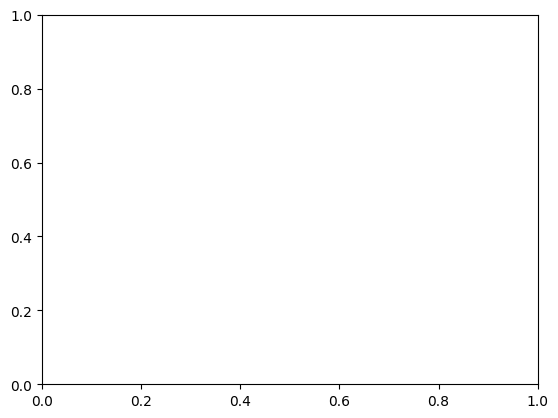

In [44]:
plt.figaspect(100)
plt.boxplot(docs_ttrs[:, 2:], labels=["Mean", "SD", "Max", "Min"])
plt.ylabel("TTR")
plt.show()


In [ ]:
# Create a boxplot
plt.figaspect(100)
plt.boxplot(docs_ttrs[:, 1:], labels=["Min", "Mean", "SD", "Max"])
plt.xlabel("TTR Statistics")
plt.ylabel("TTR")
plt.show()


In [ ]:
x = np.swapaxes(docs_ttrs,0,1)

x.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(99, 40))

# rectangular box plot
bplot1 = ax1.boxplot(x,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(x,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax2.set_title('Notched box plot')


for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], mcolors.TABLEAU_COLORS):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [ ]:
import spacy